## **1. 라이브러리, 데이터 불러오기**

1. train.csv : 학습 데이터
id : 식별 고유값
fixed acidity : 고정(비휘발성) 산도: 와인과 관련된 대부분의 산
volatile acidity : 휘발성 산도: 와인에 함유된 아세트산의 양. 너무 높으면 불쾌한 식초 맛이 날 수 있음
citric acid : 구연산: 소량으로 발견되며, 와인에 풍미를 더할 수 있음
residual sugar : 잔여 당분: 발효가 멈춘 후 남은 설탕의 양으로 1g/L 미만의 와인은 드물며 45g/L 이상의 와인은 단맛으로 간주함
chlorides : 염소화물: 와인의 염분량
free sulfur dioxide : 유리 이산화황: 미생물의 성장과 와인의 산화를 방지함
total sulfur dioxide : 총 이산화황: 저농도에서는 대부분 맛이 나지 않으나 50ppm 이상의 농도에서 맛에서 뚜렷하게 나타남
density : 밀도: 알코올 및 당 함량에 따라 변함
pH : 산성 또는 염기성 정도. 0(매우 산성) ~ 14(매우 염기성). 대부분의 와인은 pH 3-4 사이임
sulphates : 황산염: 이산화황 농도에 기여할 수 있는 와인 첨가제. 항균 및 항산화제로 작용
alcohol : 와인의 알코올 함량 백분율
type : 와인에 사용된 포도의 종류. Red(적포도주), White(백포도주)로 나뉨
quality : 맛으로 평가된 와인의 품질


2. test.csv : 테스트 데이터
id : 식별 고유값
fixed acidity : 고정(비휘발성) 산도: 와인과 관련된 대부분의 산
volatile acidity : 휘발성 산도: 와인에 함유된 아세트산의 양. 너무 높으면 불쾌한 식초 맛이 날 수 있음
citric acid : 구연산: 소량으로 발견되며, 와인에 풍미를 더할 수 있음
residual sugar : 잔여 당분: 발효가 멈춘 후 남은 설탕의 양으로 1g/L 미만의 와인은 드물며 45g/L 이상의 와인은 단맛으로 간주함
chlorides : 염소화물: 와인의 염분량
free sulfur dioxide : 유리 이산화황: 미생물의 성장과 와인의 산화를 방지함
total sulfur dioxide : 총 이산화황: 저농도에서는 대부분 맛이 나지 않으나 50ppm 이상의 농도에서 맛에서 뚜렷하게 나타남
density : 밀도: 알코올 및 당 함량에 따라 변함
pH : 산성 또는 염기성 정도. 0(매우 산성) ~ 14(매우 염기성). 대부분의 와인은 pH 3-4 사이임
sulphates : 황산염: 이산화황 농도에 기여할 수 있는 와인 첨가제. 항균 및 항산화제로 작용
alcohol : 와인의 알코올 함량 백분율
type : 와인에 사용된 포도의 종류. Red(적포도주), White(백포도주)로 나뉨




3. sample_submissoin.csv : 제출 양식
id : 식별 고유값
quality : 맛으로 평가된 와인의 품질


In [119]:
#기본 라이브러리
import numpy as np
import pandas as pd
import os
import time

#시각화 라이브러리
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)


#그래프 스타일 서식 지정
plt.style.use('default')
#그래프 한글 폰트
from matplotlib import font_manager, rc
plt.rc("font", family = "Malgun Gothic")
plt.rc("axes", unicode_minus = False)

#사이킷런
from sklearn.datasets import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, KFold

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, RocCurveDisplay
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, VotingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [125]:
wine_df = pd.read_csv('data/6주차/wine_train.csv')
wine_df.head(10)

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,1,8.0,0.18,0.37,1.3,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,white,6
1,2,7.5,0.38,0.29,4.9,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,white,7
2,3,6.1,0.27,0.33,2.2,0.021,26.0,117.0,0.98860,3.12,0.30,12.5,white,6
3,4,6.4,0.32,0.50,10.7,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,white,5
4,5,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,red,7
5,6,6.0,0.33,0.38,9.7,0.040,29.0,124.0,0.99540,3.47,0.48,11.0,white,6
6,7,6.1,0.30,0.56,2.7,0.046,46.0,184.0,0.99240,3.31,0.57,10.9,white,6
7,8,6.9,0.41,0.33,2.2,0.081,22.0,36.0,0.99490,3.41,0.75,11.1,red,6
8,9,7.4,0.44,0.20,11.5,0.049,44.0,157.0,0.99800,3.27,0.44,9.0,white,5
9,10,6.8,0.59,0.06,6.0,0.060,11.0,18.0,0.99620,3.41,0.59,10.8,red,7


## **2. EDA**

In [126]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3231 non-null   int64  
 1   fixed acidity         3231 non-null   float64
 2   volatile acidity      3231 non-null   float64
 3   citric acid           3231 non-null   float64
 4   residual sugar        3231 non-null   float64
 5   chlorides             3231 non-null   float64
 6   free sulfur dioxide   3231 non-null   float64
 7   total sulfur dioxide  3231 non-null   float64
 8   density               3231 non-null   float64
 9   pH                    3231 non-null   float64
 10  sulphates             3231 non-null   float64
 11  alcohol               3231 non-null   float64
 12  type                  3231 non-null   object 
 13  quality               3231 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 353.5+ KB


In [127]:
wine_df.describe()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000
mean,1616.000000,7.205772,0.336072,0.319496,5.454813,0.055890,30.583720,116.256577,0.994667,3.214166,0.531455,10.497108,5.829155
std,932.853686,1.295494,0.160285,0.145854,4.816098,0.035722,17.387143,55.759070,0.003054,0.161873,0.149686,1.193813,0.850003
min,1.000000,3.800000,0.080000,0.000000,0.600000,0.012000,1.000000,6.000000,0.987110,2.720000,0.220000,8.400000,4.000000
25%,808.500000,6.400000,0.227500,0.250000,1.800000,0.038000,17.000000,78.000000,0.992205,3.100000,0.430000,9.500000,5.000000
50%,1616.000000,7.000000,0.290000,0.310000,3.100000,0.047000,29.000000,119.000000,0.994840,3.200000,0.510000,10.300000,6.000000
75%,2423.500000,7.700000,0.400000,0.390000,8.100000,0.064000,42.000000,156.000000,0.996900,3.320000,0.600000,11.300000,6.000000
max,3231.000000,15.900000,1.040000,1.660000,65.800000,0.611000,131.000000,344.000000,1.038980,4.010000,1.980000,14.900000,8.000000


In [128]:
wine_df = wine_df.drop(["id"], axis = 1)

### **2-1. 불균형 데이터 파악**

In [129]:
wine_df["quality"].value_counts().sort_values(ascending = True)

8      97
4     108
7     539
5    1069
6    1418
Name: quality, dtype: int64

### **2-2. 시각화**

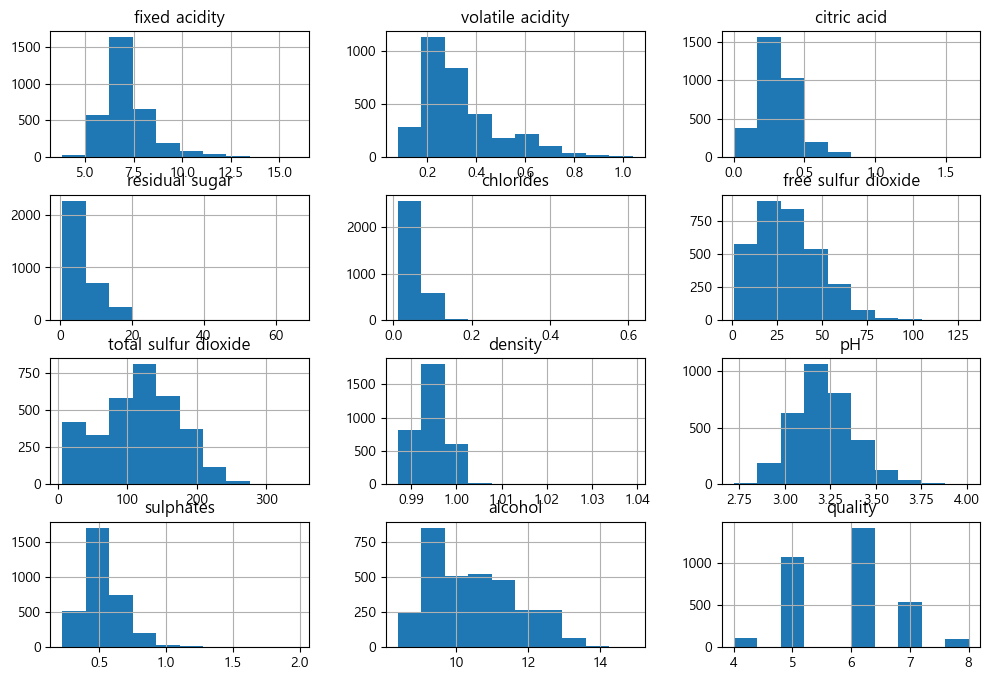

In [130]:
wine_df.hist(figsize = (12,8))
plt.show()

In [131]:
numeric_col = [col for col in wine_df if wine_df[col].dtype != "object" ]
object_col = [col for col in wine_df if wine_df[col].dtype == "object" ]

In [132]:
for obj in numeric_col:
    fig = px.histogram(wine_df, obj, color = "quality", histfunc = "count", width=512, height=250)
    
    fig.show()

In [133]:
for obj in object_col:
    fig = px.histogram(wine_df, obj, color = "quality", histfunc = "count", width=512, height=250)
    
    fig.show()

In [134]:
numeric_col

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

## **3. 이상치 제거**

TypeError: Horizontal orientation requires numeric `x` variable.

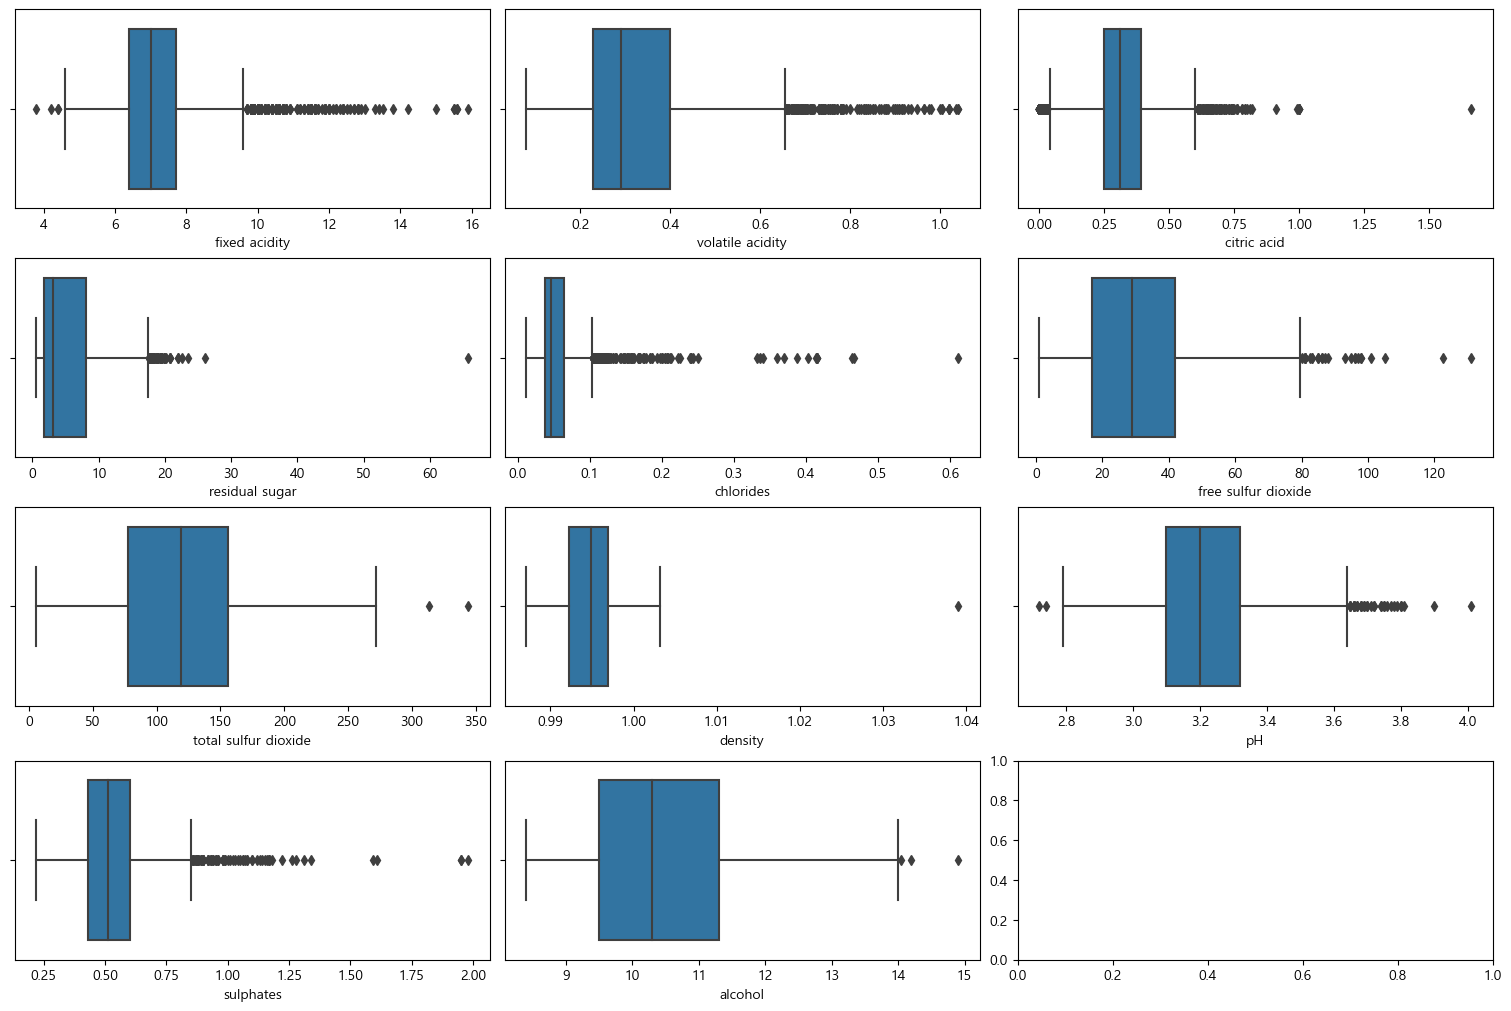

In [135]:
# boxplot을 사용한 이상치 확인

plt.figure( figsize=(15,10),
            constrained_layout = True )

for i in range(0, len(wine_df)):
    plt.subplot(4, 3, i+1) # 그래프 배열 4행 8열
    sns.boxplot(wine_df.iloc[:, i] )

In [136]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3231 non-null   float64
 1   volatile acidity      3231 non-null   float64
 2   citric acid           3231 non-null   float64
 3   residual sugar        3231 non-null   float64
 4   chlorides             3231 non-null   float64
 5   free sulfur dioxide   3231 non-null   float64
 6   total sulfur dioxide  3231 non-null   float64
 7   density               3231 non-null   float64
 8   pH                    3231 non-null   float64
 9   sulphates             3231 non-null   float64
 10  alcohol               3231 non-null   float64
 11  type                  3231 non-null   object 
 12  quality               3231 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 328.3+ KB


In [137]:
def get_outlier(data, col_name):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    q1, q3 = np.percentile(data[col_name], [25, 75])
    iqr = q3-q1
    lowest_val = q1 - iqr*1.5
    highest_val = q3 + iqr*1.5

    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = data[col_name][(data[col_name] < lowest_val) | (data[col_name] > highest_val)].index
    print(len(outlier_index))
    data.drop(outlier_index, axis=0, inplace=True)
    print(data.shape)

    return outlier_index
print(wine_df.shape)

#for col in numeric_col:
#    outlier_index = get_outlier(wine_df, col)
#    wine_df = wine_df.drop(outlier_index, axis=0, inplace = True)

(3231, 13)


## **4. 데이터 분포 확인**

In [138]:
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import shapiro

for col in wine_df[numeric_col]:
    print(col, 
          '/ Skewness :',skew(wine_df[col]), 
          '/ Kurtosis :', kurtosis(wine_df[col], fisher = True),
          '/ shapiro :', shapiro(wine_df[col])[1])

#왜도(Skewness) : 정규분포 0, 왼쪽으로 치우침 왜도>0, 오른쪽으로 치우침 왜도<0
#첨도(Kurtosis) : Fisher(정규분포 0), Pearson(정규분포 3), 위로 뾰족함 첨도> x, 아래로 뾰족함 첨도 < x 
#정규분포(Shapiro) : 0.05보다 클 때 정규분포 만족



fixed acidity / Skewness : 1.8275887165462243 / Kurtosis : 5.948309074546774 / shapiro : 1.401298464324817e-45
volatile acidity / Skewness : 1.3775885605873486 / Kurtosis : 1.8593566738725666 / shapiro : 1.961817850054744e-44
citric acid / Skewness : 0.6358184295540921 / Kurtosis : 3.4720475414886556 / shapiro : 5.784803302656454e-30
residual sugar / Skewness : 1.6653451020358383 / Kurtosis : 7.694554004351668 / shapiro : 0.0
chlorides / Skewness : 5.68961527824717 / Kurtosis : 54.2891811296877 / shapiro : 0.0
free sulfur dioxide / Skewness : 0.7050562006693026 / Kurtosis : 0.6144243382973595 / shapiro : 4.545728151348472e-28
total sulfur dioxide / Skewness : -0.051004519783238784 / Kurtosis : -0.558162275061366 / shapiro : 4.105071714889814e-19
density / Skewness : 0.9228025837477174 / Kurtosis : 12.679180264260989 / shapiro : 9.874938952627915e-32
pH / Skewness : 0.39016975634680673 / Kurtosis : 0.3930219551528311 / shapiro : 3.0503374891070745e-13
sulphates / Skewness : 1.9807573140

## **5. 원핫 인코딩**

In [196]:
x = wine_df.copy()

In [197]:
object_col = [col for col in x if x[col].dtype == "object" ]
object_col

['type']

In [198]:
#Encoding the categorical columns into numerical columns 
x_encoding = pd.get_dummies(x, columns = object_col, drop_first=True) #using pandas function
print("shape:", x_encoding.shape)
print()
x_encoding.head()

shape: (3231, 13)



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,8.0,0.18,0.37,1.3,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,6,1
1,7.5,0.38,0.29,4.9,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,7,1
2,6.1,0.27,0.33,2.2,0.021,26.0,117.0,0.98860,3.12,0.30,12.5,6,1
3,6.4,0.32,0.50,10.7,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,5,1
4,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,7,0


In [199]:
numeric_col = [col for col in x if x[col].dtype != "object" ]
object_col = [col for col in x if x[col].dtype == "object" ]

## **6. 데이터 정규화**

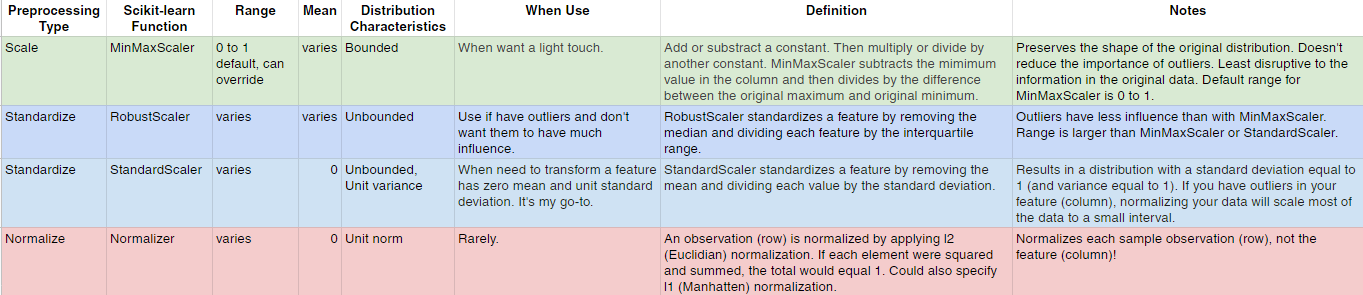

In [200]:
rs = RobustScaler()

x_scaled=rs.fit_transform(x_encoding)
x_normalize = pd.DataFrame(rs.fit_transform(x_encoding), columns=x_encoding.columns, index=x_encoding.index)

#sc = StandardScaler()
#x_normalize = pd.DataFrame(rs.fit_transform(x_encoding), columns=x_encoding.columns, index=x_encoding.index)

In [201]:
x_normalize.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,0.769231,-0.637681,0.428571,-0.285714,-0.269231,-0.56,-0.294872,-0.775293,-0.636364,0.588235,1.000000,0.0,0.0
1,0.384615,0.521739,-0.142857,0.285714,-1.000000,0.36,-0.076923,-0.975506,-0.545455,-0.176471,1.500000,1.0,0.0
2,-0.692308,-0.115942,0.142857,-0.142857,-1.000000,-0.12,-0.025641,-1.329073,-0.363636,-1.235294,1.222222,0.0,0.0
3,-0.461538,0.173913,1.357143,1.206349,0.000000,1.12,1.115385,0.417465,-0.545455,0.529412,-0.500000,-1.0,0.0
4,1.076923,0.463768,0.857143,-0.126984,0.615385,-0.68,-1.282051,0.140575,-0.136364,1.764706,0.500000,1.0,-1.0


## **7. 데이터 간 상관관계**

<AxesSubplot:>

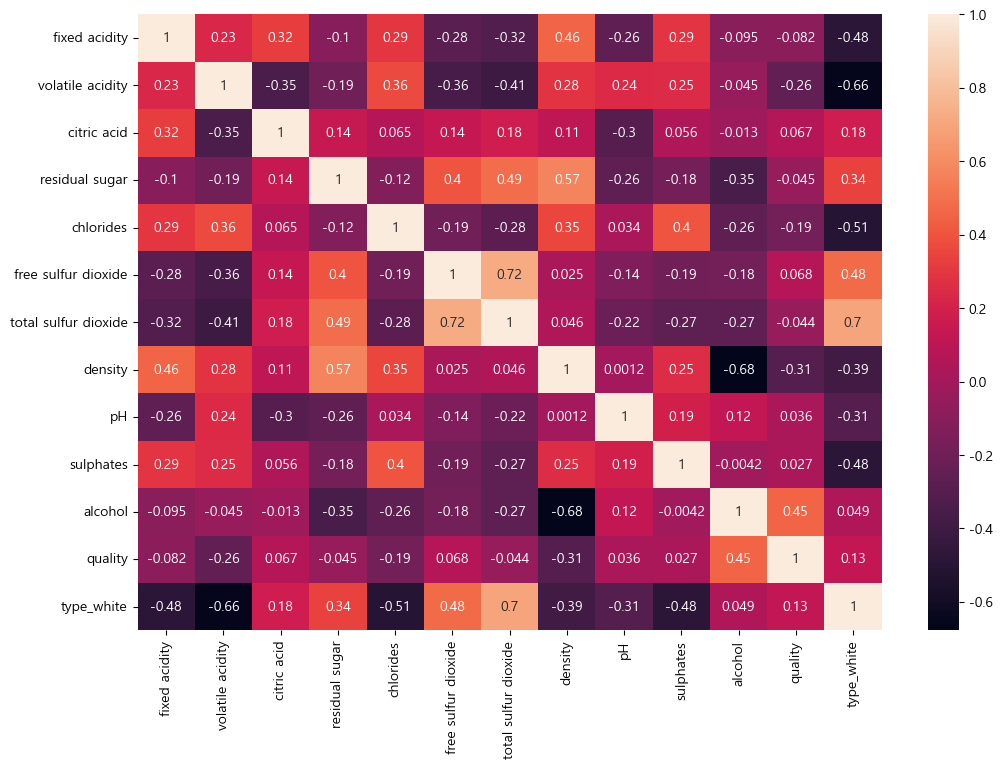

In [207]:
plt.figure(figsize=(12,8))

#plot heat map
sns.heatmap(x_normalize.corr(), annot=True)

## **8. 데이터 분리**

In [208]:
x = x_normalize.drop(["quality"], axis = 1)
y = x_normalize["quality"]

In [209]:
# 데이터셋 나누고 라벨 분포 확인
x_train, x_test, y_train, y_test  = train_test_split(x, y,
                                                     stratify = y,
                                                     test_size = 0.3,
                                                     random_state = 0 )

ValueError: num must be 1 <= num <= 12, not 13

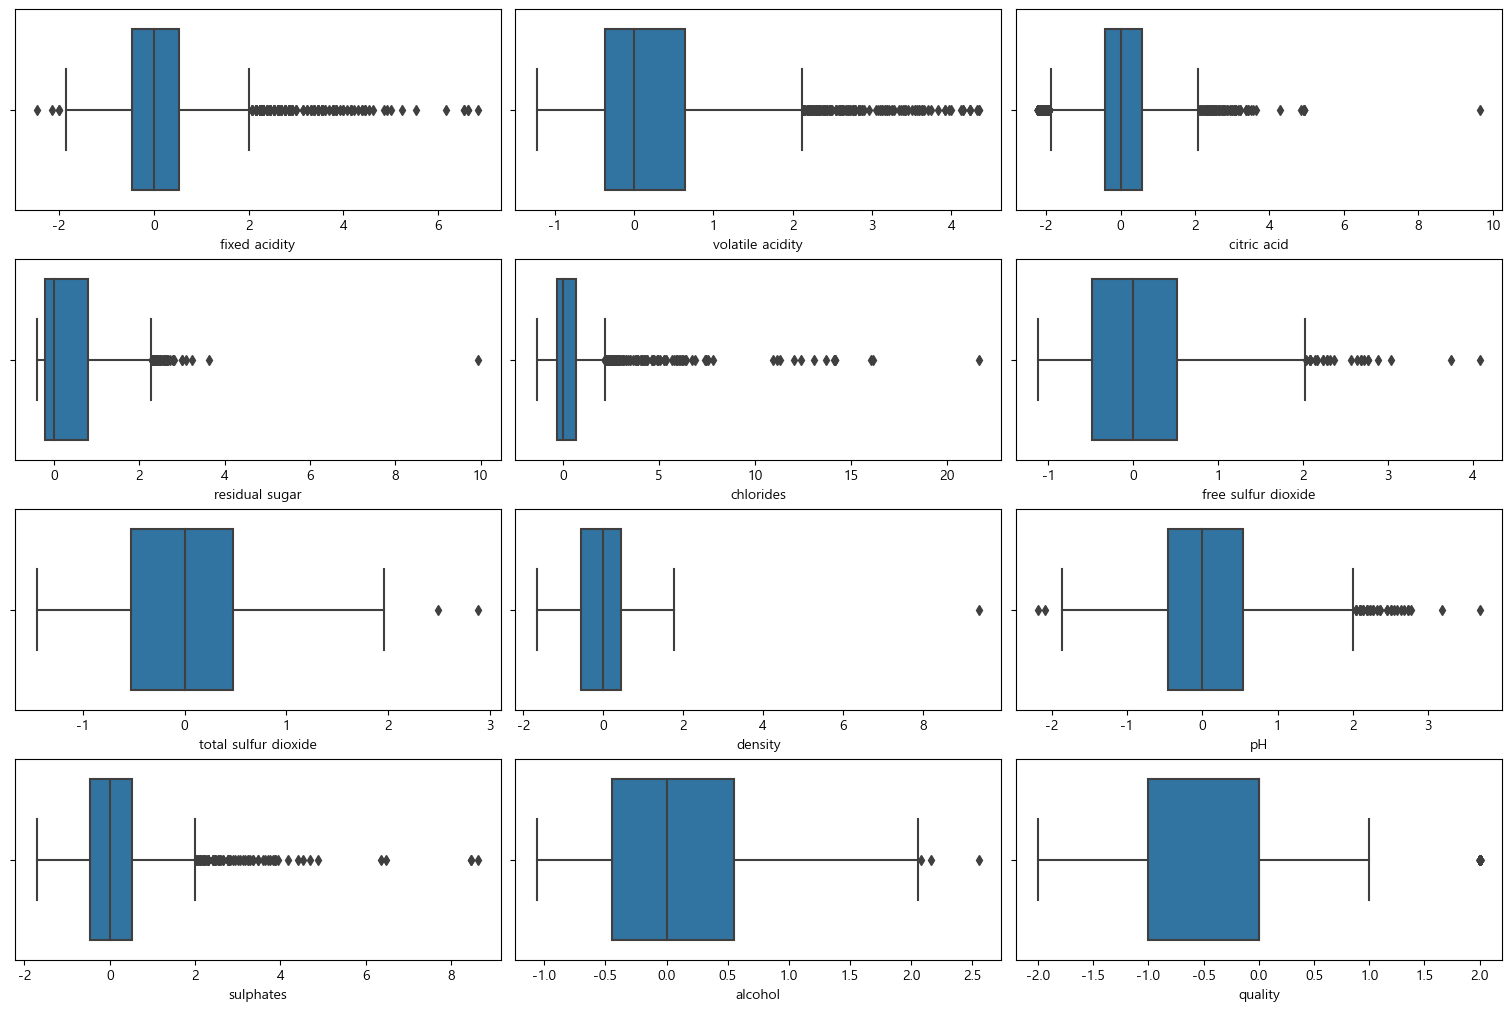

In [210]:
# boxplot을 사용한 이상치 확인

plt.figure( figsize=(15,10),
            constrained_layout = True )

for i in range(0, len(x_normalize)):
    plt.subplot(4, 3, i+1) # 그래프 배열 4행 8열
    sns.boxplot(x_normalize.iloc[:, i] )

## **9. 모델 학습하기**

In [226]:
# 인자로 사이킷런의 Estimator객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.

from sklearn.metrics import classification_report
import time

def get_model_train_eval(model, x_train, x_test, y_train, y_test):
    print('model :', model)
    # 시작 시간 측정
    start = time.time() 

    # 모델
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    pred_proba = model.predict_proba(x_test)[:, 1]
    
    # confusion matrix
    print(pd.crosstab(y_test, pred, rownames=['pred'], colnames=['real'])) 
    
    # classification report
    print(classification_report(y_test, pred)) 
    
    # AUC 산출 (Positive Label = 1)
#    auc = roc_auc_score(y_test, pred_proba)
#    print(auc)

    #ROC curve
#    fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
#    RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
#    plt.plot( [0,1], [0,1], '--' )
#    plt.title( 'ROC curve' )
#    plt.legend( labels = ['AUC = %.4f' % auc], loc = 'lower right' )
#    plt.show()

    # 끝 시간 측정
    end = time.time() 

    # 끝-시작 시간 print
    print('시간 :',end-start,'sec') 

### **9-1. 모델 학습하기**

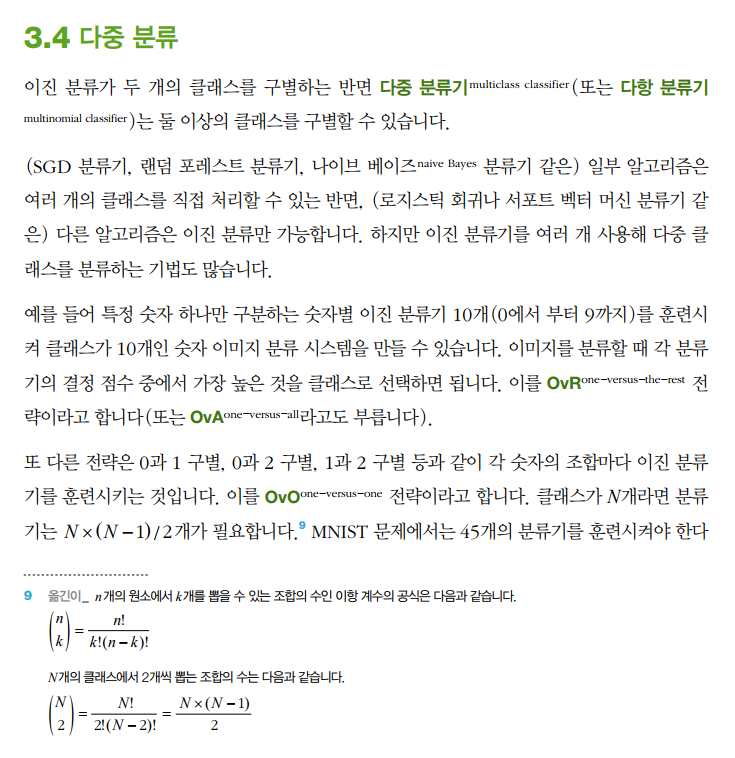
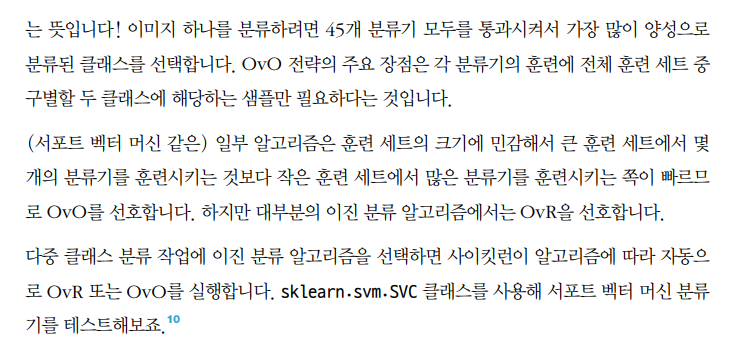

In [230]:
# 모델 한꺼번에 돌리기

svc = SVC(probability=True)
adaboost = AdaBoostClassifier()
xgboost = XGBClassifier()
lightgbm = LGBMClassifier()
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
knn = KNeighborsClassifier()
gnb = GaussianNB()

models = [svc, adaboost, xgboost, lightgbm, decisiontree, randomforest, knn, gnb]

for i, model in enumerate(models):
#    print(model)
    get_model_train_eval(model, x_train, x_test, y_train, y_test)
    print('-----------------------------------------------------')

model : SVC(probability=True)
real  -1.0   0.0   1.0
pred                  
-2.0    21    11     0
-1.0   192   129     0
 0.0    77   327    22
 1.0     6   125    31
 2.0     0    23     6
              precision    recall  f1-score   support

        -2.0       0.00      0.00      0.00        32
        -1.0       0.65      0.60      0.62       321
         0.0       0.53      0.77      0.63       426
         1.0       0.53      0.19      0.28       162
         2.0       0.00      0.00      0.00        29

    accuracy                           0.57       970
   macro avg       0.34      0.31      0.31       970
weighted avg       0.54      0.57      0.53       970

시간 : 1.7313895225524902 sec
-----------------------------------------------------
model : AdaBoostClassifier()
real  -2.0  -1.0   0.0   1.0   2.0
pred                              
-2.0     4    22     6     0     0
-1.0    17   174   127     0     3
 0.0    13   110   261    34     8
 1.0     1    11   103    33    14

C:\Users\anjui\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\anjui\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\anjui\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\anjui\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the foll

[22:17:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
real  -2.0  -1.0   0.0   1.0   2.0
pred                              
-2.0     1    24     7     0     0
-1.0     5   204   102    10     0
 0.0     3    82   297    42     2
 1.0     0     6    90    66     0
 2.0     0     0    10    12     7
              precision    recall  f1-score   support

        -2.0       0.11      0.03      0.05        32
        -1.0       0.65      0.64      0.64       321
         0.0       0.59      0.70      0.64       426
         1.0       0.51      0.41      0.45       162
         2.0       0.78      0.24      0.37        29

    accuracy                           0.59       970
   macro avg       0.53      0.40      0.43       970
weighted a

C:\Users\anjui\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\anjui\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\anjui\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



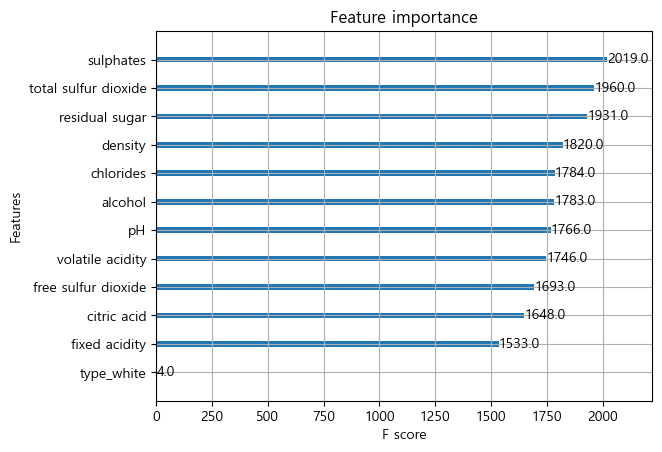

In [245]:
plot_importance(xgboost)
plt.show()

In [238]:
xgb_param_grid ={
    'max_depth' : [3,4,5,6] , 
    'n_estimators': [400], 
    'learning_rate': [0.1], 
    'gamma': [0.5, 1, 2]
}

In [239]:
from sklearn.model_selection import GridSearchCV, KFold

rf = RandomForestClassifier()
kf = KFold(random_state = 0,
          n_splits = 10,
          shuffle = True)

xgb_grid_search = GridSearchCV(xgboost, xgb_param_grid, cv = kf, n_jobs = -1, verbose = 2)

In [240]:
xgb_grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


C:\Users\anjui\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:35:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0.5,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.05, max_delta_step=0,
                                     max_depth=4, min_child_weight=1,
                                     missing=nan, m...aints='()',
                                     n_estimators=100, n_jobs=12,
                                     num_parallel_tree=1,
                                     objective='multi:softprob',
                                     predictor='auto', random_state=0,
                                     reg_alpha=0

In [241]:
xgb_grid_search.best_params_

{'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 400}

In [244]:
xgboost = XGBClassifier(gamma = 0.5, learning_rate = 0.1, max_depth = 10, n_estimators = 1000)
get_model_train_eval(xgboost, x_train, x_test, y_train, y_test)

model : XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=0.5, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_delta_step=None, max_depth=10,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)
[22:51:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior

C:\Users\anjui\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



real  -2.0  -1.0   0.0   1.0   2.0
pred                              
-2.0     0    23     9     0     0
-1.0     2   209   100     9     1
 0.0     1    82   298    44     1
 1.0     1    10    87    63     1
 2.0     0     0    10    12     7
              precision    recall  f1-score   support

        -2.0       0.00      0.00      0.00        32
        -1.0       0.65      0.65      0.65       321
         0.0       0.59      0.70      0.64       426
         1.0       0.49      0.39      0.43       162
         2.0       0.70      0.24      0.36        29

    accuracy                           0.59       970
   macro avg       0.49      0.40      0.42       970
weighted avg       0.58      0.59      0.58       970

시간 : 11.310598373413086 sec


1. 이상치가 너무 많아서 이상치에 그나마 둔감한 RobustScaler 사용
 - 더 나은 방법은 없었는지?
2. 다중 분류여서 auc, 및 roc curve 생성 어려움, 코드는 있으나 지금 이해 못함, accuracy로만 판단함
 - https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a
3. 파라미터 튜닝 ...
 - 연습 더